<a href="https://colab.research.google.com/github/miguel05mex78-bot/DataScienceMastery/blob/main/Bayesian_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install scikit-optimize


In [2]:
pip install scikit-optimize

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

## Loading libraries: BayesSearchCV function for Bayestian Optimization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from skopt.plots import plot_objective, plot_convergence, plot_gaussian_process,plot_evaluations
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from skopt import BayesSearchCV

#Data preparation and exploration

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

/tmp/ipython-input-974895194.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette=['blue', 'green'])


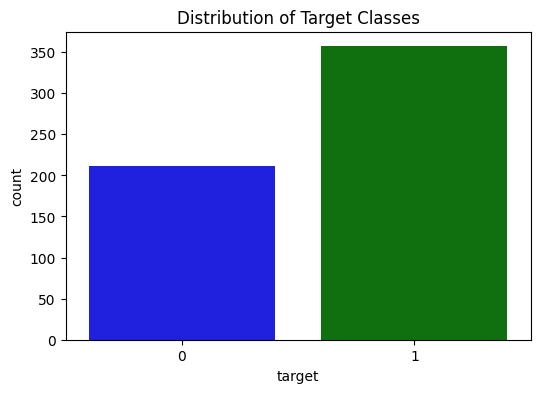

In [13]:
data = load_breast_cancer()


df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df)

# Plot the distribution of  classes
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette=['blue', 'green'])
plt.title('Distribution of Target Classes')
plt.xticks(ticks=[0, 1], labels=['0', '1'])  #
plt.show()

     mean texture  mean perimeter  mean area  mean smoothness  \
0           10.38          122.80     1001.0          0.11840   
1           17.77          132.90     1326.0          0.08474   
2           21.25          130.00     1203.0          0.10960   
3           20.38           77.58      386.1          0.14250   
4           14.34          135.10     1297.0          0.10030   
..            ...             ...        ...              ...   
564         22.39          142.00     1479.0          0.11100   
565         28.25          131.20     1261.0          0.09780   
566         28.08          108.30      858.1          0.08455   
567         29.33          140.10     1265.0          0.11780   
568         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017       

/tmp/ipython-input-3334734506.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Target', loc='upper right')
/tmp/ipython-input-3334734506.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Target', loc='upper right')
/tmp/ipython-input-3334734506.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Target', loc='upper right')
/tmp/ipython-input-3334734506.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Target',

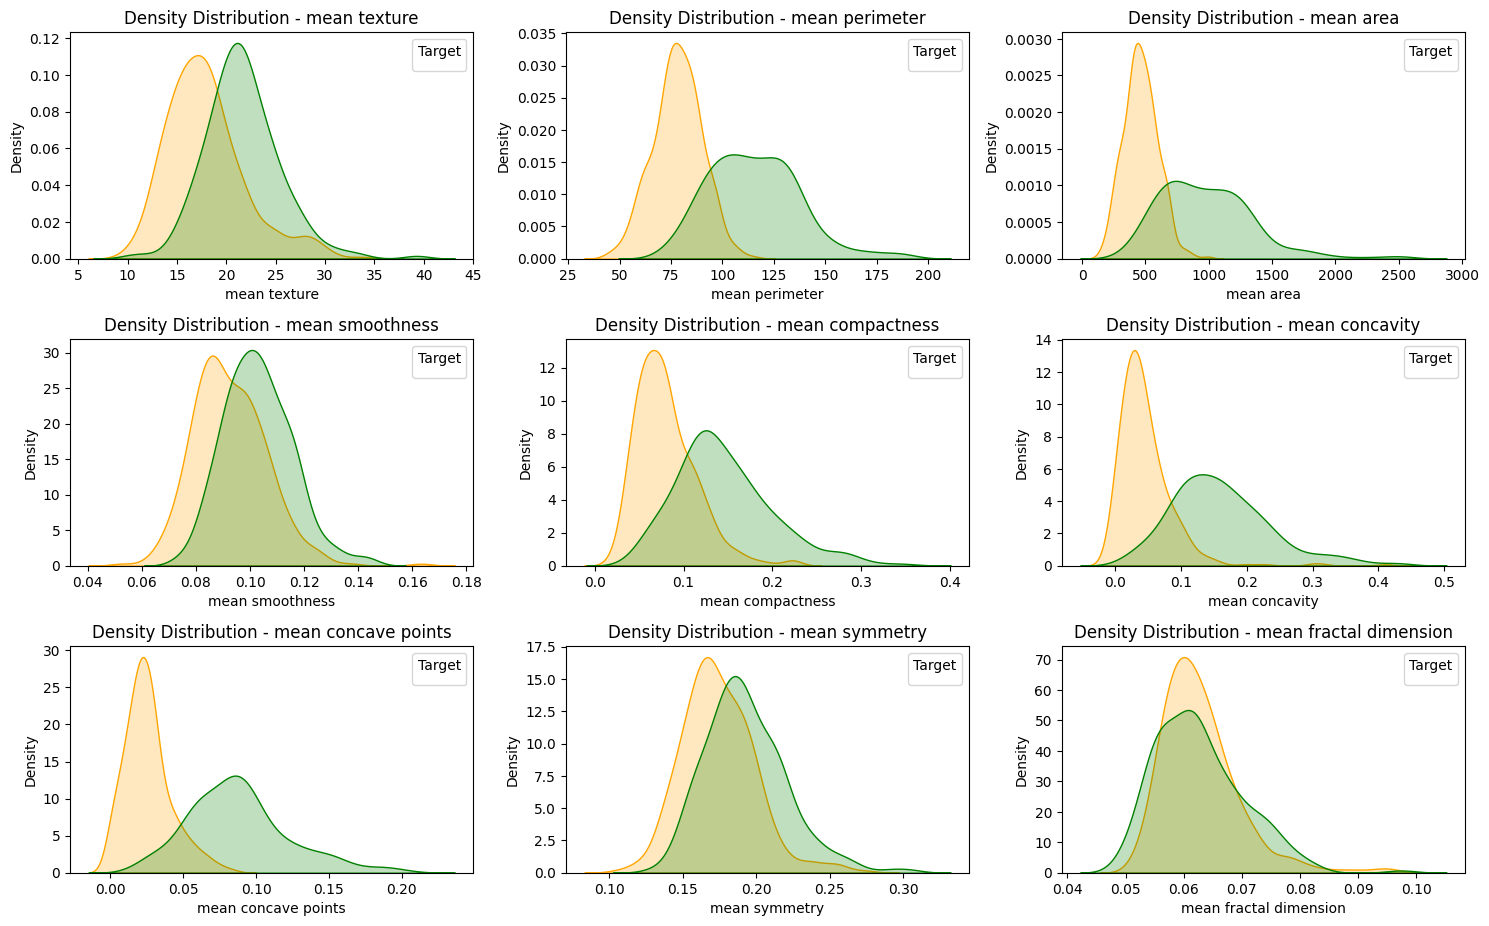

In [15]:
# Selected feature names
selected_features = ['mean texture', 'mean perimeter', 'mean area', 'mean smoothness','mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']

# Filter the DataFrame based on selected features
df_selected = pd.DataFrame(data.data, columns=data.feature_names)[selected_features]
df_selected['target'] = data.target
print(df_selected)

# Plot the density distribution for each selected feature in the same grid
plt.figure(figsize=(15, 12))
for i, feature in enumerate(selected_features, start=1):
    plt.subplot(4, 3, i)
    sns.kdeplot(data=df_selected, x=feature, hue='target', fill=True, common_norm=False, palette={0: 'green', 1: 'orange'})
    plt.title(f'Density Distribution - {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Target', loc='upper right')

plt.tight_layout()
plt.show()

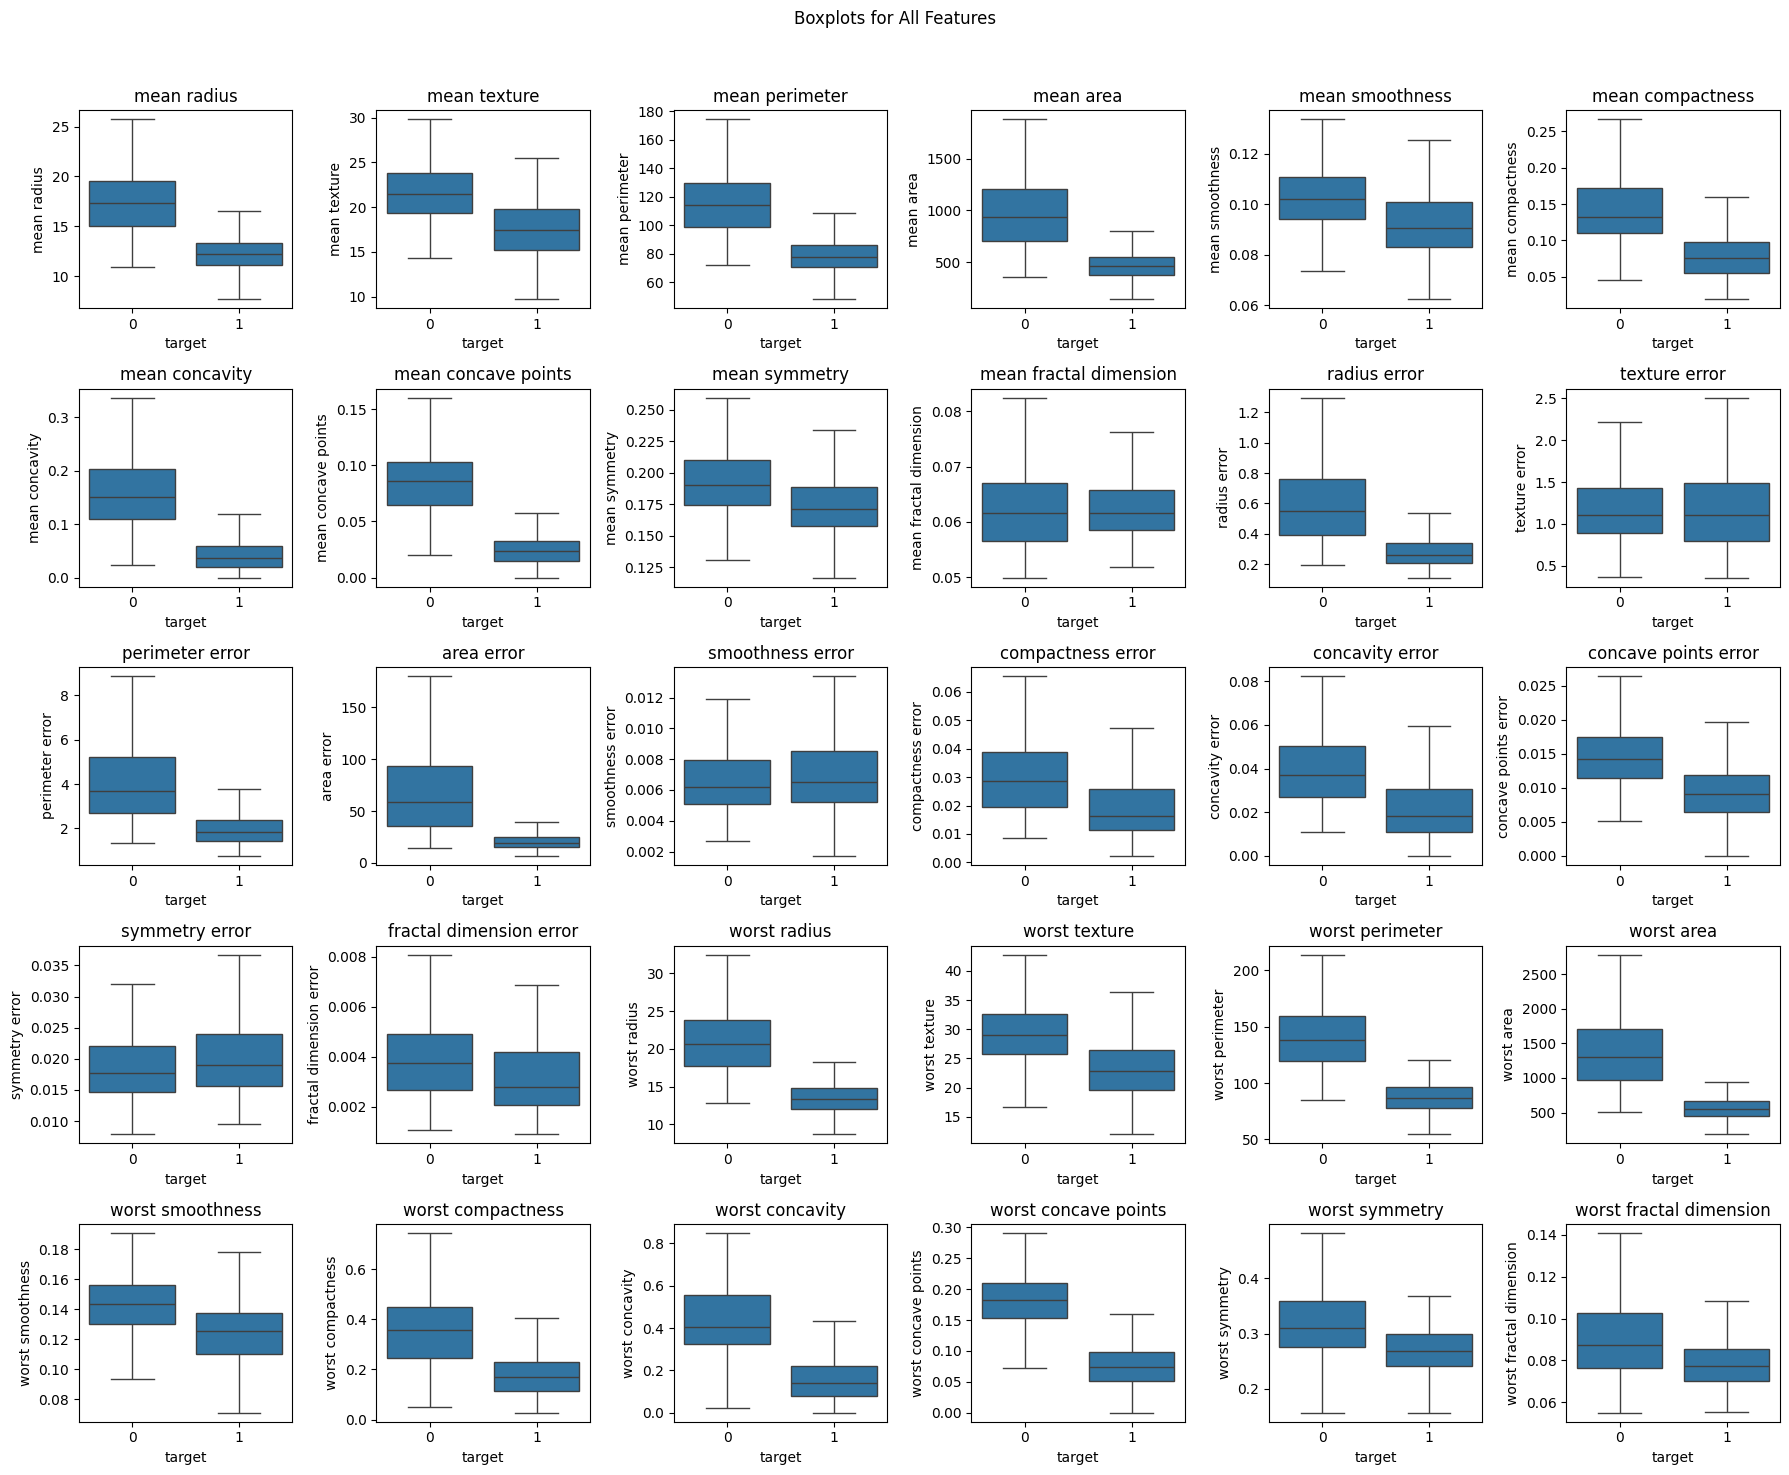

In [16]:
# Create subplots for all 30 features
fig, axes = plt.subplots(5, 6, figsize=(18, 15))
fig.suptitle('Boxplots for All Features')

for i, feature in enumerate(df.columns[:-1]):  # Exclude the target variable
    sns.boxplot(ax=axes[i // 6, i % 6], x='target', y=feature, data=df, showfliers=False)
    axes[i // 6, i % 6].set_title(feature)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Figure size 1200x800 with 0 Axes>

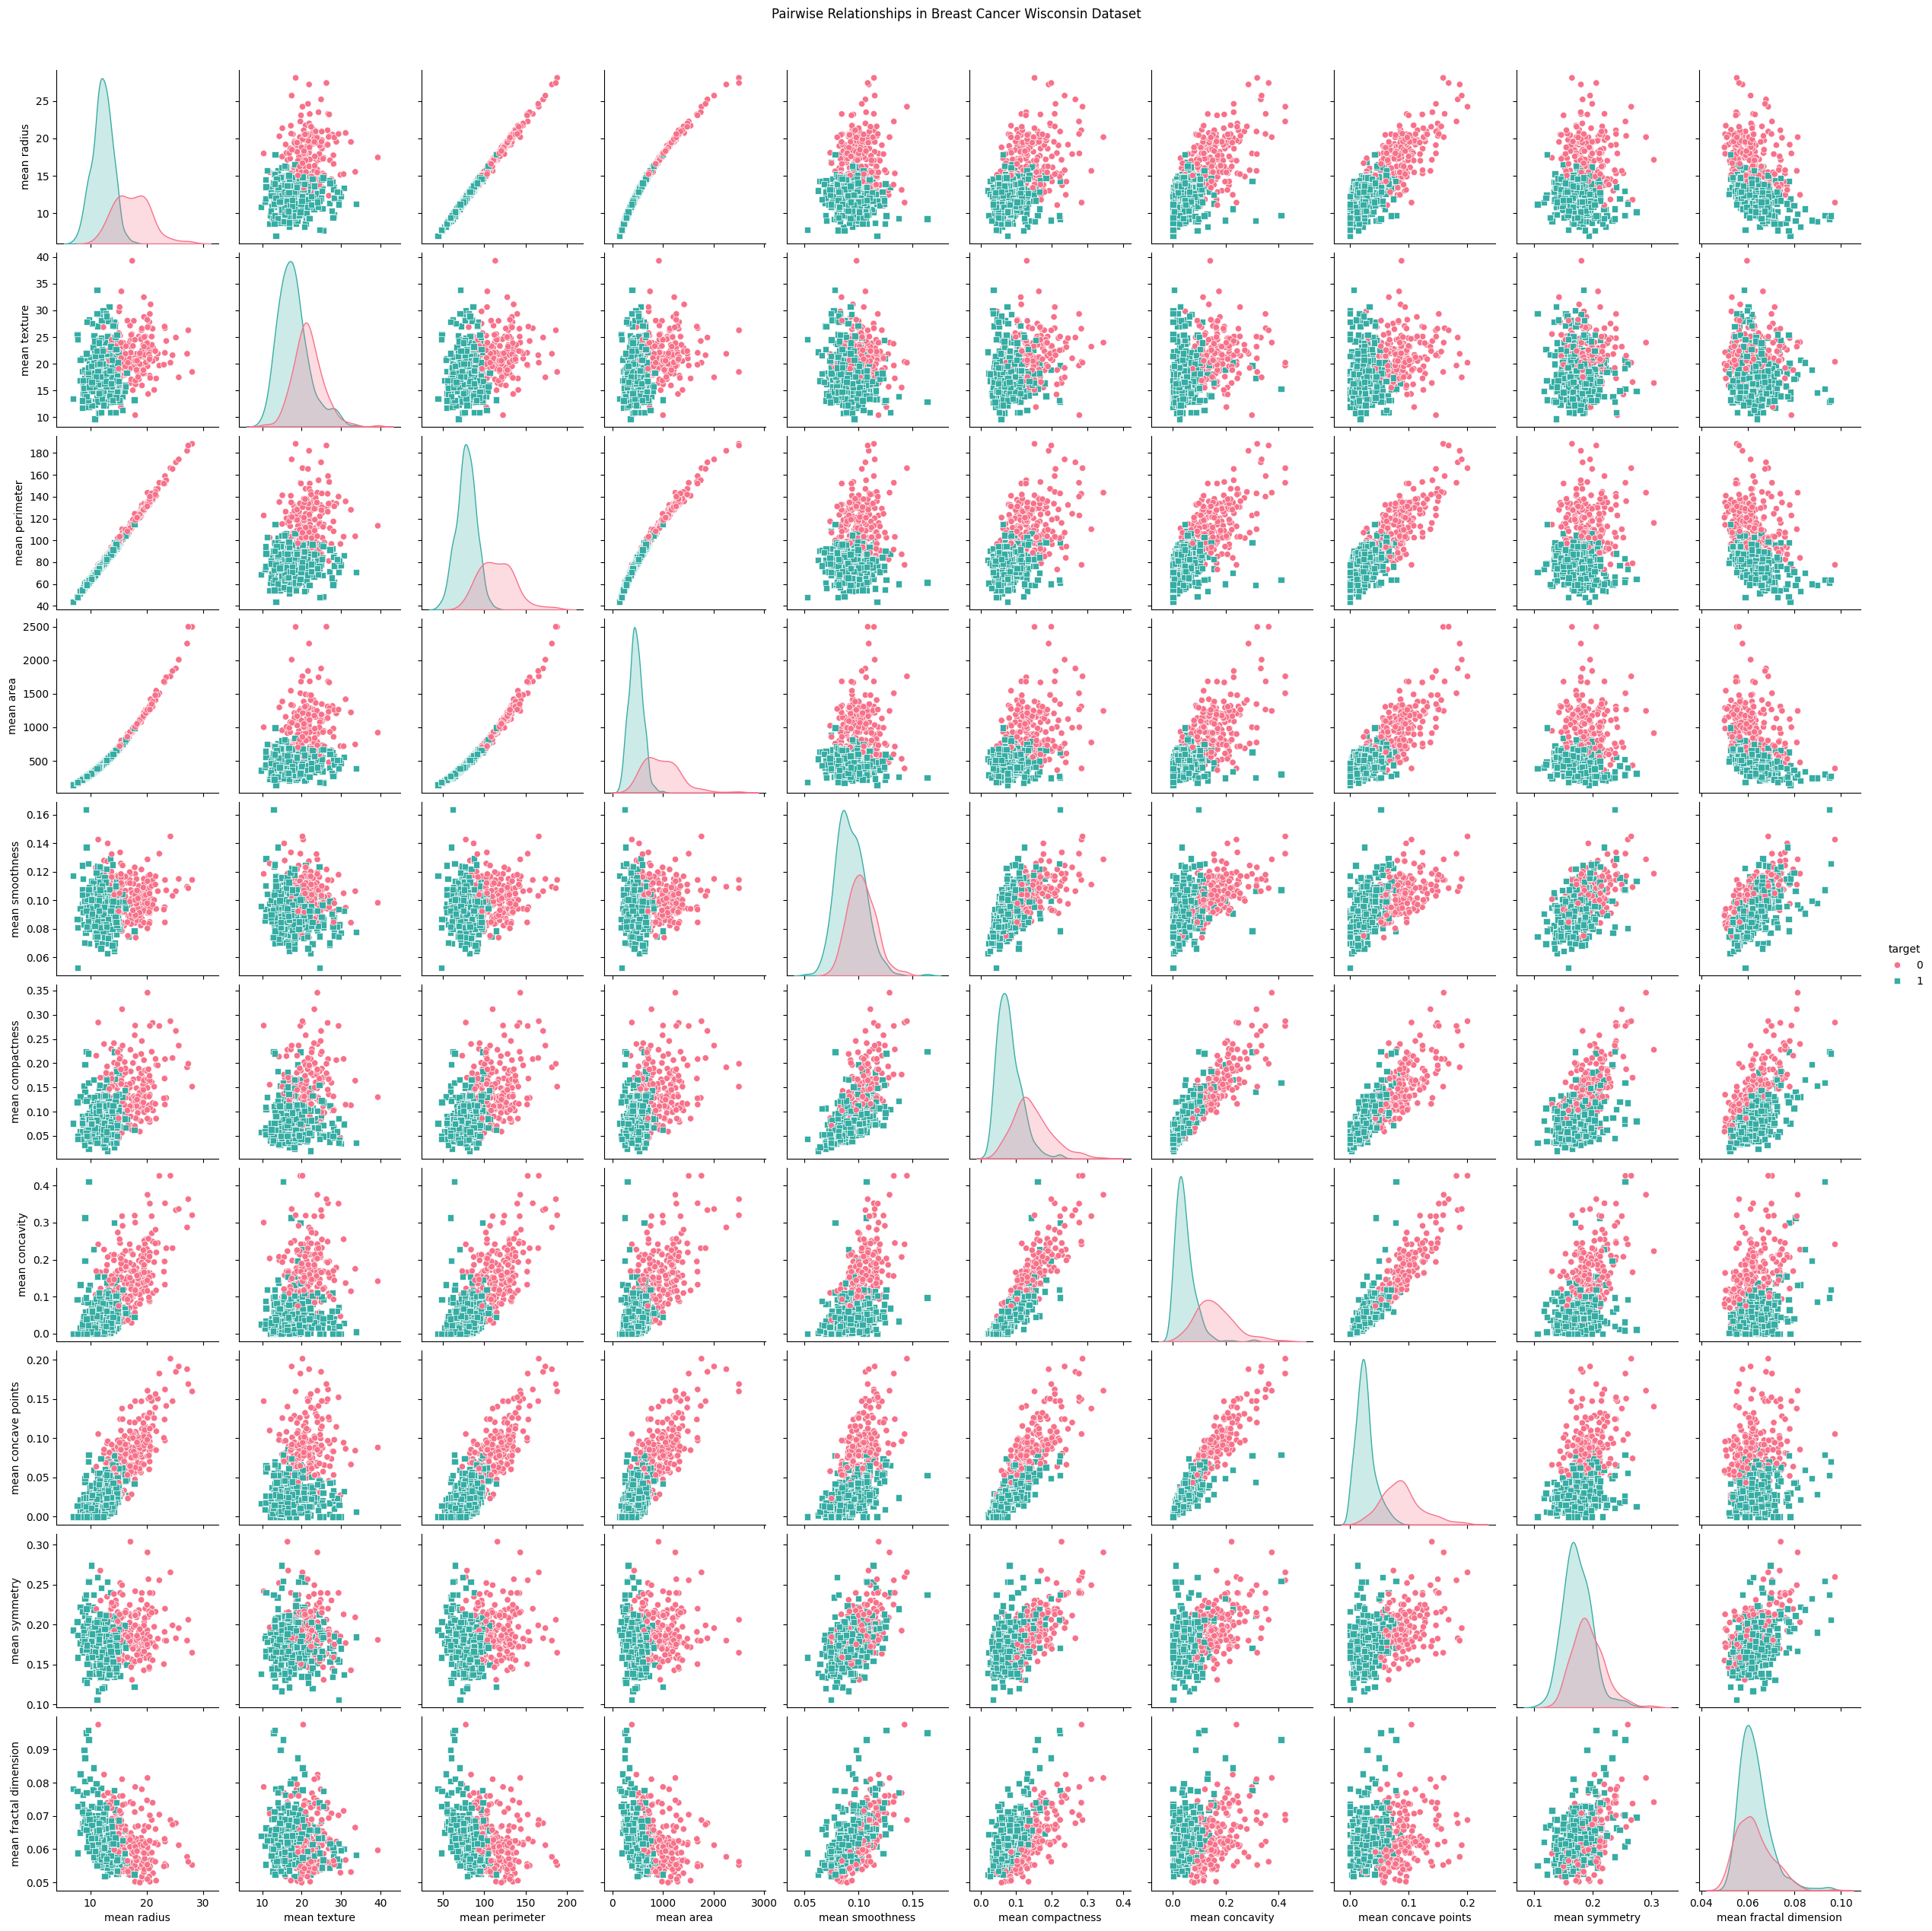

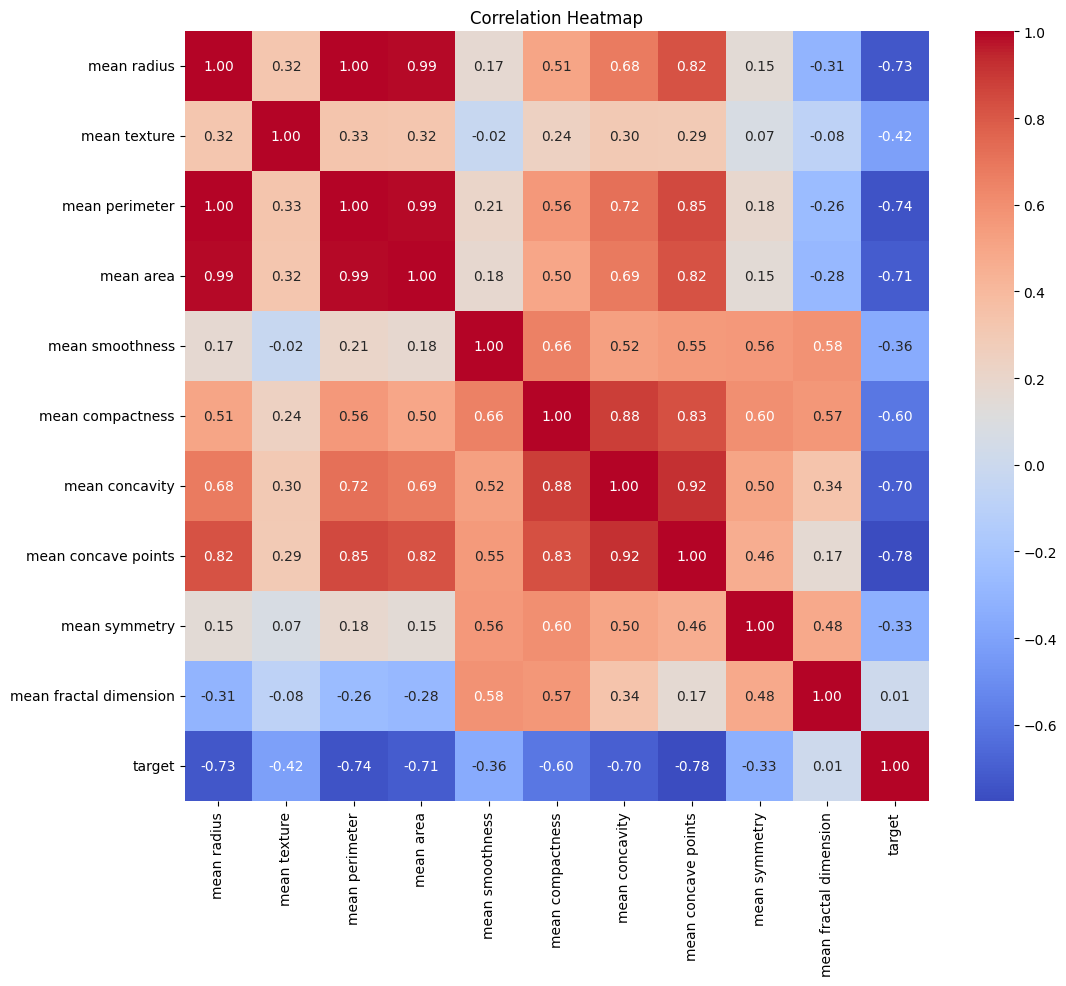

In [19]:
# Selected feature names
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness','mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']

# Filter the DataFrame based on selected features
df_selected = pd.DataFrame(data.data, columns=data.feature_names)[selected_features]
df_selected['target'] = data.target

# Plot a pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(df_selected, hue='target', markers=['o', 's'], palette='husl')
plt.suptitle('Pairwise Relationships in Breast Cancer Wisconsin Dataset', y=1.02)
plt.show()

# Plot a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Bayesian Optimization and testing with SVM model with the cancer dataset

In [32]:
# Load the Breast Cancer Wisconsin dataset
# data = load_breast_cancer()
X, y = data.data, data.target

# Step 1: Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 2: Define the hyperparameter space
param_space = {'C': [0.1, 1, 10, 15],
               'gamma': [0.1, 1],
               'kernel': ['rbf', 'linear']}


# param_space =  {'C': [0.1, 1, 10],
#                    'gamma': [ 0.1,0.5, 1],
#                    'degree': [2,3],
#                    'kernel': ['rbf', 'linear', 'poly']}



bayes_cv = BayesSearchCV(
    SVC(),
    param_space,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

np.int = int

# Fit the BayesSearchCV object
bayes_cv.fit(X_train, y_train)

# Step 5: Get the best hyperparameters
best_params = bayes_cv.best_params_

# Step 6: Train the model on the complete training set with the best hyperparameters
best_model = SVC(**best_params)
best_model.fit(X_train, y_train)

# Step 7: Evaluate the final trained model on the test set
test_accuracy = best_model.score(X_test, y_test)


/usr/local/lib/python3.12/dist-packages/skopt/space/space.py:116: UserWarning: Dimension [0.1, 1] was inferred to Real(low=0.1, high=1.0, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(0.1, 1), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skopt/space/space.py:116: UserWarning: Dimension [0.1, 1] was inferred to Real(low=0.1, high=1.0, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(0.1, 1), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skopt/space/space.py:116: UserWarning: Dimension [0.1, 1] was inferred to Real(low=0.1, high=1.0, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred

In [33]:
# Print Results
print("Best Hyperparameters:", best_params)
print("Test Set Accuracy:", test_accuracy)

Best Hyperparameters: OrderedDict({'C': 10, 'gamma': 0.37979487952431124, 'kernel': 'linear'})
Test Set Accuracy: 0.9122807017543859


Next step: determine how specific features impact performance

<Axes: >

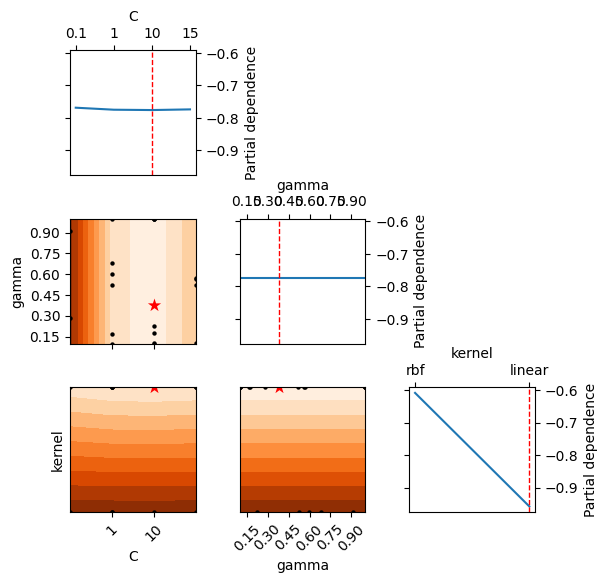

In [34]:
plot_objective(bayes_cv.optimizer_results_[0], cmap='Oranges')

Which iteraion gives the best performance?

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

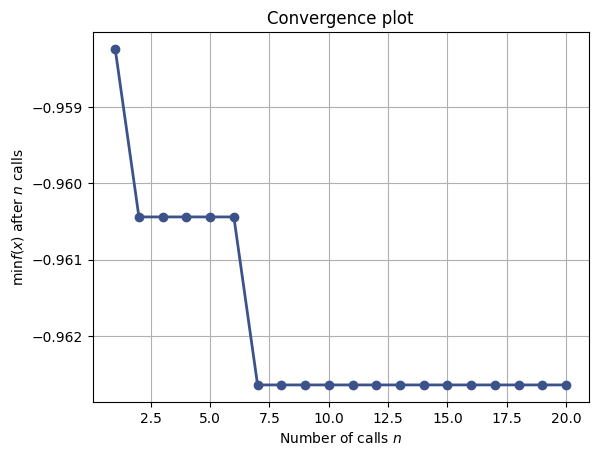

In [35]:
plot_convergence(bayes_cv.optimizer_results_[0])

### Extreme Gradient Boosting

In [36]:
## xgb
from xgboost import XGBClassifier


# Load the Breast Cancer Wisconsin dataset
# data = load_breast_cancer()
# X, y = data.data, data.target

# # Step 1: Create training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 2: Define the hyperparameter space for XGBoost
param_space_xgb = {
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'n_estimators': (50, 200),
    'max_depth': (1, 10),
    'subsample': (0.1, 1.0, 'uniform'),
    'min_child_weight': (1, 10)
}

# Step 3: Perform Bayesian optimization using BayesSearchCV
bayes_cv_xgb = BayesSearchCV(
    XGBClassifier(),
    param_space_xgb,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

np.int = int
# Fit the BayesSearchCV object
bayes_cv_xgb.fit(X_train, y_train)

# Step 5: Get the best hyperparameters
best_params_xgb = bayes_cv_xgb.best_params_

# Step 6: Train the model on the complete training set with the best hyperparameters
best_model_xgb = XGBClassifier(**best_params_xgb)
best_model_xgb.fit(X_train, y_train)

# Step 7: Evaluate the final trained model on the test set
test_accuracy_xgb = best_model_xgb.score(X_test, y_test)


In [37]:
# Print Results
print("Best Hyperparameters:", best_params_xgb)
print("Best Cross-Validation Accuracy:", bayes_cv_xgb.best_score_)
print("Test Set Accuracy:", test_accuracy_xgb)

Best Hyperparameters: OrderedDict({'learning_rate': 0.3586763397218182, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 69, 'subsample': 0.46351789494439255})
Best Cross-Validation Accuracy: 0.9626373626373625
Test Set Accuracy: 0.9298245614035088


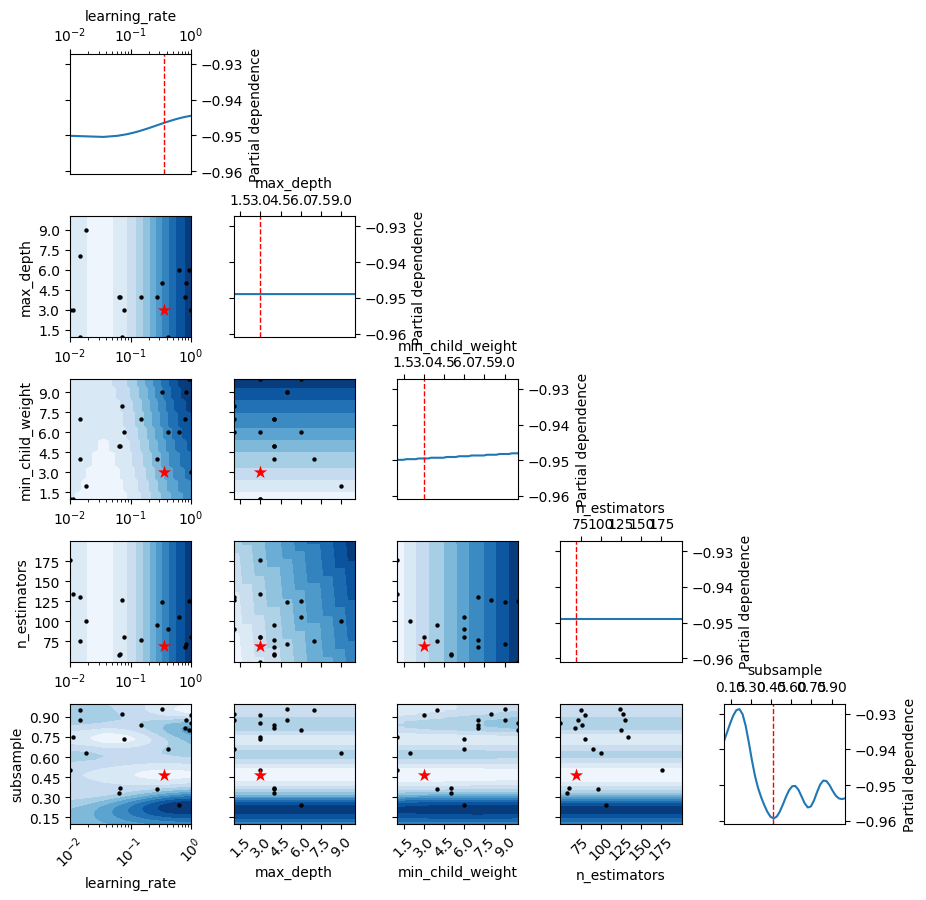

In [38]:
## xgb

# Plot the objective
from skopt.plots import plot_objective

plot_objective(bayes_cv_xgb.optimizer_results_[0], cmap='Blues')
plt.show()

## Each row/column corresponds to one hyperparameter:

## learning_rate

## max_depth

## min_child_weight

## n_estimators

## subsample
## Diagonal Plots

## These show the partial dependence of the objective (CV score) on a single hyperparameter.

## Y-axis = cross-validation score (looks like negative RMSE or negative MAE).

## Blue curve = model-estimated objective.

## Red dashed line = best parameter found.

## learning_rate shows slight improvement toward higher values.

##  max_depth looks almost flat → not very sensitive.

##  subsample shows more variation → likely more influential.

## Lower-Triangle Contour Plots

## These show pairwise interactions between parameters.

## Darker blue = better performance (since you’re minimizing a negative score).

## Red star ⭐ = best combination found.

## Black dots = sampled points during Bayesian search.

## These help you see:

## Whether two parameters interact strongly.

## Whether the optimum lies at a boundary (suggesting your search space might need expansion).

## Based on the visual trends:

## learning_rate: Performance improves as it increases. Your optimum is near the higher end → consider extending search slightly upward (e.g., up to 1.2 if reasonable).

## max_depth: Very flat curve → low importance in this range. Might not need wide search.

## min_child_weight: Slight upward trend → moderate impact.

## n_estimators: Flat → possibly redundant if learning rate compensates.

## subsample Most curvature → likely important. Optimum around ~0.45–0.5.
## Actionable Suggestions
## 1. Narrow Future Search Around Promising Zones
## Instead of wide ranges:
## learning_rate: (0.3, 1.0)
## subsample: (0.3, 0.6)

## 2. Remove Low-Impact Parameters (Optional)
## If max_depth and n_estimators remain flat across runs, you could:
## Fix them to reasonable defaults
## Focus Bayesian search on influential ones

## 3.Check If Optimum Lies on Boundary
## If best value is near an edge → expand that boundary slightly.

## What This Plot Is Really Telling You
## Bayesian optimization is already: Exploring efficiently, Converging to a stable region, Not finding sharp ridges → your model is relatively stable. It means the model is not extremely sensitive to small hyperparameter changes.


<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

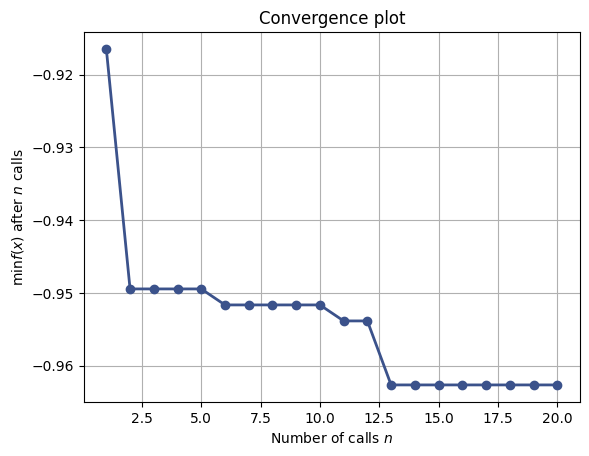

In [39]:
## xgb
plot_convergence(bayes_cv_xgb.optimizer_results_[0])

## Deep Learning

### Neural Networks: automatically determine weights for features, they do not select the number of hidden layers, activation functions, and another parameters. We do it with Bayesian Opimization

In [40]:
## ANN
from sklearn.neural_network import MLPClassifier

# # Load the Breast Cancer Wisconsin dataset
# data = load_breast_cancer()
# X, y = data.data, data.target

# # Step 1: Create training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 2: Define the hyperparameter space
param_space = {
    'alpha': (1e-5, 1e-2, 'log-uniform'),
    'hidden_layer_sizes': [20, 50, 100],
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'solver': ['lbfgs', 'sgd', 'adam']
}



# Step 3: Define the objective function
# MLPClassifier()

# Step 4: Perform Bayesian optimization using BayesSearchCV
bayes_cv = BayesSearchCV(
    MLPClassifier(),
    param_space,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the BayesSearchCV object
bayes_cv.fit(X_train, y_train)

# Step 5: Get the best hyperparameters
best_params = bayes_cv.best_params_

# Step 6: Train the model on the complete training set with the best hyperparameters
best_model = MLPClassifier(**best_params)
best_model.fit(X_train, y_train)

# Step 7: Evaluate the final trained model on the test set
test_accuracy = best_model.score(X_test, y_test)



In [41]:
## ANN
# Print Results
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", bayes_cv.best_score_)
print("Test Set Accuracy:", test_accuracy)

Best Hyperparameters: OrderedDict({'activation': 'relu', 'alpha': 0.0003007941341959183, 'hidden_layer_sizes': 50, 'learning_rate': 'invscaling', 'solver': 'lbfgs'})
Best Cross-Validation Accuracy: 0.9428571428571428
Test Set Accuracy: 0.9298245614035088


<Axes: >

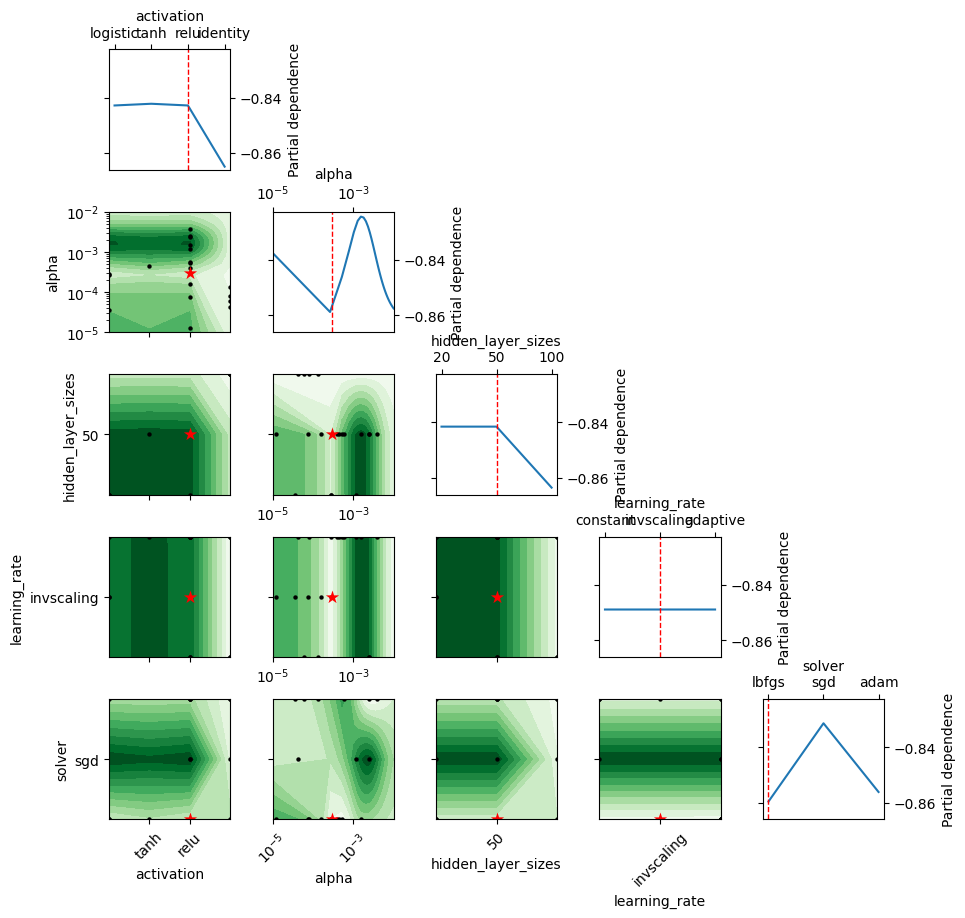

In [42]:
## ANN

plot_objective(bayes_cv.optimizer_results_[0], cmap='Greens')

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

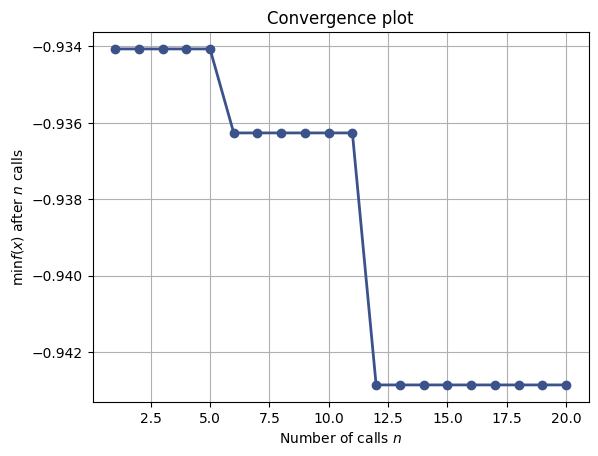

In [43]:
## ANN

plot_convergence(bayes_cv.optimizer_results_[0])